# Optical Character Recognition model for multiclass classification

## Introduction

We will utilize the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database), which includes a collection of 28x28 pixel images representing handwritten digits ranging from 0 to 9. The objective of this dataset is to train models for recognizing handwritten numbers.

Consequently, we will train an [OCR (Optical Character Recognition)](https://en.wikipedia.org/wiki/Optical_character_recognition) model to perform multiclass classification on these digits (0 through 9).

## Libraries and data

In [63]:
# libraries

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt
import datetime
import netron
import gradio as gr 
tf.keras.utils.set_random_seed(0)

In [64]:
# load data

(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [65]:
x_train[0].shape

(28, 28)

Since these are 8-bit images, each pixel's color (in this case, just the gray channel) is represented by a value between 0 and 255, where 0 corresponds to black and 255 to white. It is common practice to normalize these values to fall within a range from 0.0 to 1.0 for easier processing.

In [66]:
x_train, x_test = x_train / 255.0, x_test / 255.0

**Why Use One-Hot Encoding?**

*Compatibility with Loss Functions:*

Many loss functions, like categorical_crossentropy, expect the targets to be in one-hot encoded format. One-hot encoding ensures that the labels are in a format that these functions can use.

*Prevent Misinterpretation:*

Using integer labels directly can cause the model to interpret them as ordinal (i.e., having an inherent order), which is not the case for class labels. One-hot encoding eliminates this issue by treating each class label as a separate, independent entity.

*Neural Network Training:*

Neural networks work better with one-hot encoded labels because they can compare the predicted probabilities for each class directly with the one-hot encoded labels. This helps the network learn the correct class probabilities more effectively.

In [67]:
y_train = to_categorical(y_train) # this is like one hote encoding in keras
y_test = to_categorical(y_test)

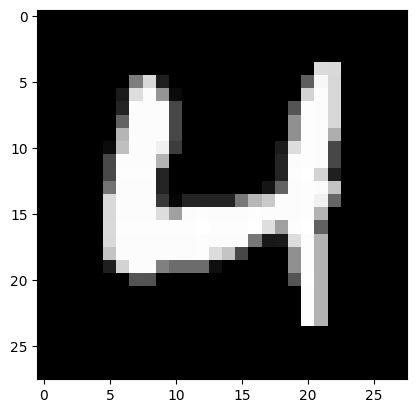

In [68]:
# visualizing a random image

i = np.random.randint(0, len(x_train))
plt.imshow(x_train[i], cmap='gray')
plt.show()

We are going to assign the classes randomly to each image with random shuffle to see why do we need to use regularization.

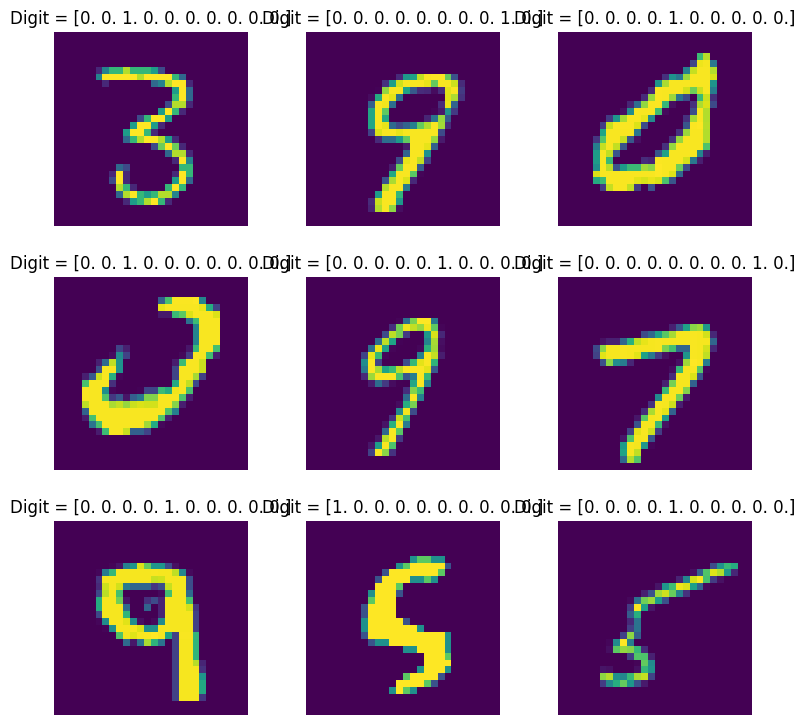

In [69]:
y_shuffle = np.copy(y_train)
np.random.shuffle(y_shuffle)
y_train[:5], y_shuffle[:5]

fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes = axes.ravel()

for i in np.arange(0, 9):
    ind = np.random.randint(len(y_shuffle))
    axes[i].imshow(x_train[ind].reshape(28, 28))
    axes[i].set_title(
        f"Digit = {y_shuffle[ind]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.3)

## Modeling


TensorBoard is a suite of visualization tools within TensorFlow that enables us to track and display the progress and outcomes of our training process.

To get started with this tool, here is a notebook from the TensorFlow tutorial on TensorBoard.

In [79]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


We construct the model with an input layer that has a size of `28x28`. For the output layer, which handles a multiclass classification task with 10 possible categories, we will have 10 neurons utilizing the softmax activation function.

To get the model to generalize, we can use one of the numerous regularization techniques. One of them is regularizer l2, which adds a penalty to the loss function based on the sum of the squared weights. This penalty encourages the model to learn simpler patterns that are less likely to overfit the training data.

In [80]:
kernel_regularizer_l2 = keras.regularizers.l2(5e-4)


### Model 1: Fully Connected Neural Network



*Flatten Layer:*

Converts the input from a 2D matrix (28x28 pixels) to a 1D vector (784 pixels).
This transformation is necessary for dense layers to process the data.

*Hidden Layers:*

Two dense (fully connected) layers with 64 neurons each and ReLU activation.
The second hidden layer includes L2 regularization to prevent overfitting.

*Output Layer:*

Dense layer with 10 neurons and softmax activation.
The softmax activation is used to classify the input into one of the 10 possible classes (digits 0-9).



In [81]:
### model 1 

model1 = tf.keras.models.Sequential(name="tensorboard_model")
model1.add(layers.Flatten(input_shape=(28, 28)))

# hidden Layer + regularization

model1.add(layers.Dense(64, activation='relu', name='layer_1'))
model1.add(layers.Dense(64, activation='relu',
                       kernel_regularizer=kernel_regularizer_l2, name='layer_2'))
# output layer

model1.add(layers.Dense(10, activation='softmax', name='output_layer'))

In [82]:
log_dir = 'logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')

In [83]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [84]:
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [85]:
model1.fit(
    x=x_train,
    y=y_train,
    epochs=20,
    validation_split=0.2,
    batch_size=32,
    callbacks=[tensorboard_callback, es_callback]
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8338 - loss: 0.5896 - val_accuracy: 0.9477 - val_loss: 0.2051
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9534 - loss: 0.1873 - val_accuracy: 0.9570 - val_loss: 0.1736
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9663 - loss: 0.1396 - val_accuracy: 0.9597 - val_loss: 0.1587
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9737 - loss: 0.1139 - val_accuracy: 0.9618 - val_loss: 0.1505
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9785 - loss: 0.0949 - val_accuracy: 0.9620 - val_loss: 0.1490
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9835 - loss: 0.0812 - val_accuracy: 0.9610 - val_loss: 0.1513
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9862 - loss: 0.0702 - val_accuracy: 0.9613 - val_loss: 0.1524
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9883 - loss: 0.0621 - 

In [86]:
results = model1.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.14904631674289703
Test Accuracy: 0.9657999873161316


### Model 2: Convolutional Neural Network

*Convolutional Layers:*

Three convolutional layers with 32 and 64 filters of size 3x3 and ReLU activation.
Convolutional layers are good at detecting local features in images, such as edges and textures.

*Pooling Layers:*

Two max pooling layers of size 2x2, which reduce the spatial dimensionality of the representation while retaining the most important features.
Max pooling helps reduce the size of feature maps and control overfitting.

*Flatten Layer:*

Converts the 2D feature maps into a 1D vector so that dense layers can process the data.

*Dense Layers:*

One dense layer with 64 neurons and ReLU activation.
Output layer with 10 neurons and softmax activation for classification.

In [87]:
### model 2

model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
])

model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

In [88]:
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [89]:
es_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # can be 'val_accuracy'
    patience=10,  # if during 5 epochs there is no improvement in `val_loss`, the execution will stop
    verbose=1)

In [90]:
model2.fit(
    x=x_train,
    y=y_train,
    epochs=20,
    validation_split=0.2,
    batch_size=32,
    callbacks=[tensorboard_callback, es_callback]
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8710 - loss: 0.3983 - val_accuracy: 0.9777 - val_loss: 0.0713
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9822 - loss: 0.0573 - val_accuracy: 0.9818 - val_loss: 0.0621
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9872 - loss: 0.0398 - val_accuracy: 0.9803 - val_loss: 0.0662
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9903 - loss: 0.0294 - val_accuracy: 0.9862 - val_loss: 0.0513
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9921 - loss: 0.0226 - val_accuracy: 0.9825 - val_loss: 0.0674
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9944 - loss: 0.0177 - val_accuracy: 0.9838 - val_loss: 0.0643
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9949 - loss: 0.0146 - val_accuracy: 0.9878 - val_loss: 0.0479
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9954 - loss: 0

In [91]:
results = model2.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.05651563033461571
Test Accuracy: 0.9907000064849854


### Differences Between the Models


**Architecture:**

Model 1: Uses only dense layers. It is a fully connected neural network that flattens the image input before passing it through the dense layers.
Model 2: Uses convolutional and pooling layers, followed by dense layers. It is a convolutional neural network that first extracts local features from the image before passing them through the dense layers.

**Feature Extraction:**

Model 1: Does not have built-in mechanisms for extracting local features from images.
Model 2: Convolutional layers are designed to detect local features, which improves the model's ability to recognize patterns in images.

**Dimensionality Reduction:**

Model 1: Does not perform dimensionality reduction aside from the initial flattening.
Model 2: Pooling layers reduce the spatial dimensionality of the representations, which helps reduce computational complexity and control overfitting.



### Why the Second Model Has Better Metrics


**Feature Extraction Capability:**

Model 2 uses convolutional layers, which are more effective at extracting meaningful features from images compared to the dense layers used in Model 1.

**Dimensionality Reduction:**

The max pooling layers in Model 2 help reduce the dimensionality of the intermediate representations, decreasing the risk of overfitting and improving the model's generalization.

**Local Pattern Detection:**

The convolutional layers in Model 2 can detect local patterns such as edges, textures, and other important image features, enhancing the model's ability to recognize and classify images accurately.

**Computational Efficiency:**

The dimensionality reduction through max pooling in Model 2 can also make the model more computationally efficient, allowing for faster and more effective training.

In summary, **Model 2** has an architecture better suited for image processing, enabling it to extract and utilize relevant features more effectively, resulting in superior performance compared to Model 1.

### Plotting predictions

In [92]:
predictions = model2.predict(x_test)
predicted_classes = np.argmax(predictions, -1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


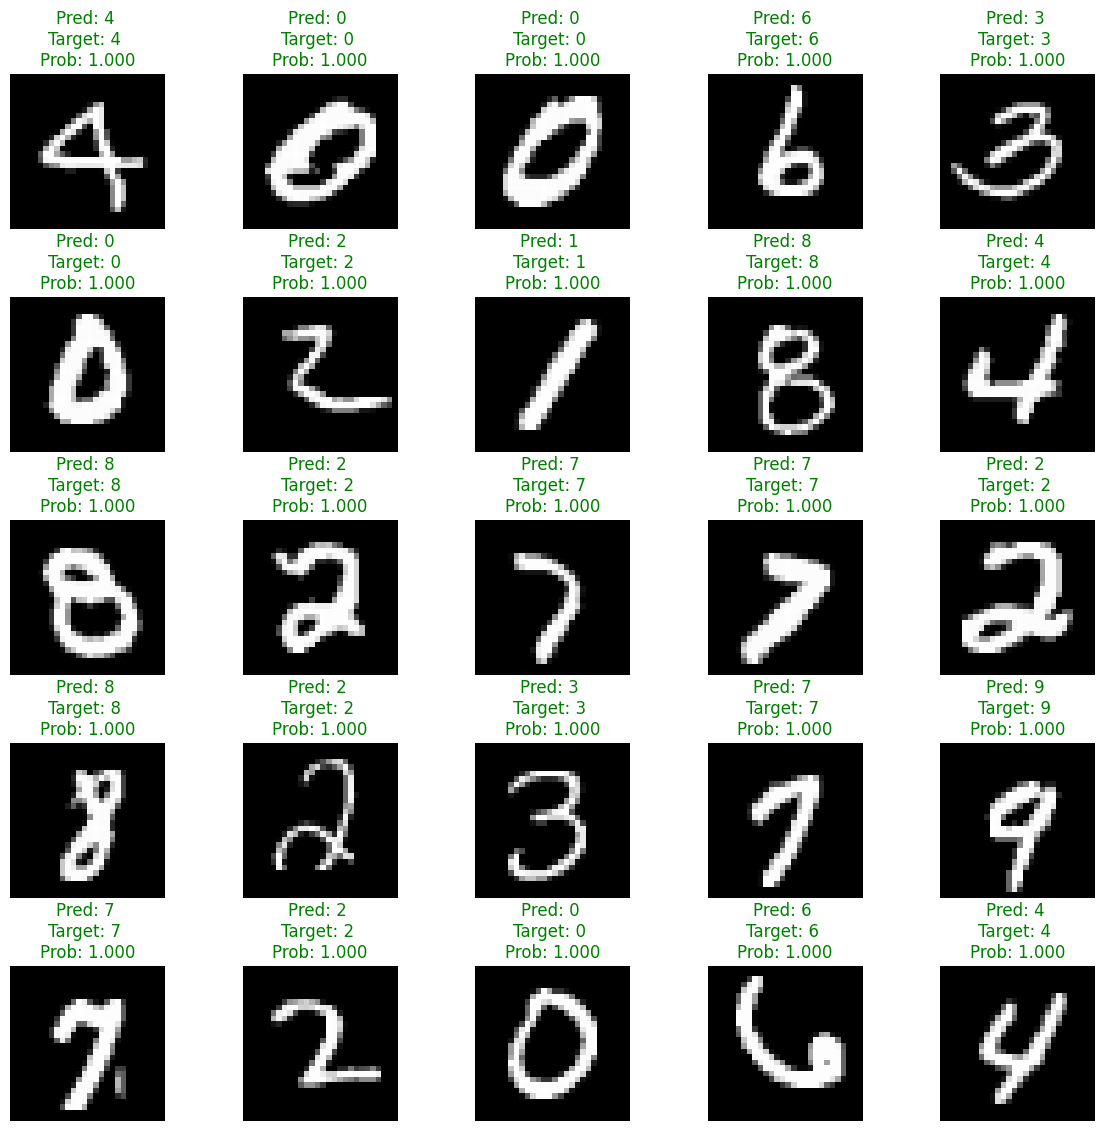

In [94]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(14, 14))
axes = axes.ravel()

for i in np.arange(0, L * W):
    ind = np.random.randint(len(y_test))
    axes[i].imshow(x_test[ind].reshape(28, 28), cmap='gray')  # Ensure the image is displayed in grayscale
    
    prob_pred = np.max(predictions[ind, :])
    class_pred = int(predicted_classes[ind])
    original_class = int(np.argmax(y_test[ind]))  # Convert one-hot encoded label to class index
    
    if class_pred == original_class:
        color = 'green'
    else:
        color = 'red'
        
    title = "Pred: {0} \nTarget: {1} \nProb: {2:.3f}".format(class_pred, original_class, prob_pred)
    axes[i].set_title(title, color=color)
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
plt.show()

In [95]:
# saving the model

model2.save('model2.h5')
model2.save('model2.keras')

## Visualizing the model

Netron is an open-source viewer for neural network, deep learning, and machine learning models. It supports a variety of model formats and provides a graphical interface to visualize and understand the structure and components of models.

In [96]:
netron.start('model2.h5')

Serving 'model2.h5' at http://localhost:8080


('localhost', 8080)

## Interactive UI

This setup is particularly useful for demonstrating and deploying machine learning models in an interactive and user-friendly way.

In [97]:
modelo = tf.keras.models.load_model("model2.h5")

def img_classif(img):
    img = np.reshape(img, (1, 28, 28, 1)).astype("float32") / 255
    predic = modelo.predict(img)
    predic_digit = np.argmax(predic)
    return str(predic_digit)

interface = gr.Interface(fn=img_classif , inputs="sketchpad", outputs="label")
interface.launch()

Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.


IMPORTANT: You are using gradio version 3.50.2, however version 4.29.0 is available, please upgrade.
--------
